In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns

import time
import keyboard


class MarkovChain:
    def __init__(self, transition_matrix):
        """
        Inicializa a cadeia de Markov.

        Parameters:
        - transition_matrix: Uma matriz de transição de Markov.
        - initial_state: O estado inicial da cadeia.
        - score: pontuação da cadeia para um conjunto de valores de treino.
        """
        self.transition_matrix = transition_matrix
        self.current_state = np.array(np.zeros(len(transition_matrix)))
        self.score = 0
        self.cost = 0

    def transition(self):
        """
        Realiza uma transição de estado de acordo com a matriz de transição.
        """

        new_state = self.transition_matrix @ self.current_state
        self.current_state = new_state
    
    
    def sim(self, data):
        return self.transition_matrix @ data
    
   
    #=============================================================================================================
    def procriate(self, epsilon=0.1):
        """
        Cria uma nova cadeia de Markov baseada na cadeia existente.
        Uma pequena alteração aleatória é inserida em k elementos da matriz de transição.
        """
        M = self.transition_matrix.copy()

        # Escolhe uma posição aleatória na matriz
        row_idx = np.random.choice(M.shape[0])
        col_idx = np.random.choice(M.shape[1])

        # Gera uma alteração aleatória proporcional à posição escolhida
        # perturbation = np.random.uniform(epsilon*0.1, epsilon)
        perturbation = epsilon
        
        # Seleciona a coluna que será mudada
        col = M[:,col_idx]
        
        # incrementa a perturbação na linha sortiada
        col[row_idx] += perturbation
        
        # Regulariza a coluna para que sua soma dê 1
        col = col/col.sum()
        M[:,col_idx] = col
        
        return MarkovChain(M)
    #=============================================================================================================
    
    def rms(self, data_in, data_out):
        """
        Retorna o desvio quadrado da simulação de uma transição em relação
        aos dados de entrada e saida fornecidos.
        """
        simu = self.transition_matrix @ data_in
        return np.sqrt((data_out-simu)**2).sum()
    
    def reset_cost(self):
        self.cost = 0
    


In [2]:
# Baixa oss dados diários das principais ações 
# Define as principais ações para o modelo

features = 'ABEV3 B3SA3 ITUB4 PETR4 VALE3 CIEL3 JBSS3 LREN3 BBDC4 ELET3'.split(" ")
n = len(features)

dados = pd.DataFrame([])

for feat in features:
    dados[feat] = yf.download(feat+'.SA',
                          start = '2024-01-01',
                          end = '2024-03-28',
                          interval = '1d')['Adj Close'].abs()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
dados

,ABEV3,B3SA3,ITUB4,PETR4,VALE3,CIEL3,JBSS3,LREN3,BBDC4,ELET3
Date,,,,,,,,,,
2024-01-02,13.71,14.17,33.501953,37.779999,77.050003,4.54,25.170000,17.209999,16.710302,41.740002
2024-01-03,13.60,14.13,33.132153,38.959999,76.650002,4.71,24.469999,16.889999,16.729254,41.689999
2024-01-04,13.65,13.72,32.912270,38.630001,75.620003,4.63,24.120001,16.230000,16.499538,41.330002
2024-01-05,13.60,13.97,33.681858,38.720001,74.650002,4.88,24.070000,16.639999,16.859093,41.259998
2024-01-08,13.71,14.28,33.322048,38.430000,74.269997,4.97,23.940001,17.280001,16.729254,41.060001
2024-01-09,13.62,14.06,33.302059,38.099998,73.330002,4.77,24.000000,16.809999,16.279810,41.680000
2024-01-10,13.76,13.92,33.272076,37.750000,72.230003,4.79,24.280001,16.490000,16.000158,42.759998
2024-01-11,13.56,13.95,33.332043,38.070000,72.610001,4.79,24.160000,16.450001,15.920257,43.209999
2024-01-12,13.59,14.10,33.372021,38.169998,71.690002,4.73,24.709999,16.959999,15.790419,42.930000


In [4]:
modelo = MarkovChain(np.loadtxt(r'C:\Users\usuario\OneDrive\Área de Trabalho\programas\ajuste-1-02-2024-003.txt', delimiter=','))

In [5]:
resultados = []
print('Ticker  ','Previsto   ','Real    ','var Prev','var real')
for i in range(len(features)):
    prev = round(modelo.sim(dados.iloc[-2])[i],2)
    real = round(dados.iloc[-1,i],2)
    var_prev = round((modelo.sim(dados.iloc[-2])[i]-dados.iloc[-2,i])/dados.iloc[-2,i],2)
    var_real = round((dados.iloc[-1,i]-dados.iloc[-2,i])/dados.iloc[-2,i],2)
    resultados.append([features[i],prev,real,var_prev,var_real])
    print(resultados[i])

Ticker   Previsto    Real     var Prev var real
['ABEV3', 13.81, 13.07, 0.06, -0.0]
['B3SA3', 13.45, 13.29, 0.03, 0.02]
['ITUB4', 32.31, 32.69, -0.01, -0.0]
['PETR4', 36.41, 41.57, -0.11, 0.02]
['VALE3', 68.51, 67.45, 0.01, -0.0]
['CIEL3', 4.78, 4.96, -0.04, -0.0]
['JBSS3', 23.64, 23.1, 0.01, -0.01]
['LREN3', 18.06, 16.16, 0.13, 0.01]
['BBDC4', 15.98, 15.3, 0.04, -0.0]
['ELET3', 41.11, 41.6, 0.01, 0.02]


In [6]:
df = pd.DataFrame(resultados, columns=['Ticker', 'Preço Previsto', 'Preço Real', 'Variação prevista', 'Variação Real'])
df

,Ticker,Preço Previsto,Preço Real,Variação prevista,Variação Real
0,ABEV3,13.81,13.07,0.06,-0.00
1,B3SA3,13.45,13.29,0.03,0.02
2,ITUB4,32.31,32.69,-0.01,-0.00
3,PETR4,36.41,41.57,-0.11,0.02
4,VALE3,68.51,67.45,0.01,-0.00
5,CIEL3,4.78,4.96,-0.04,-0.00
6,JBSS3,23.64,23.10,0.01,-0.01
7,LREN3,18.06,16.16,0.13,0.01
8,BBDC4,15.98,15.30,0.04,-0.00
9,ELET3,41.11,41.60,0.01,0.02


In [7]:
K = cenario.shape[0]
ini = cenario.iloc[0]
for j, day in dados.iloc[1::].iterrows():
    i.cost += i.rms(ini,day)
    ini = day
i.cost = i.cost/K



269.19096783557984

In [21]:
pre = []
ini = dados.iloc[0]
for j, day in dados.iloc[1::].iterrows():
    pre.append(modelo.sim(ini)-day)
    ini = day

pre

[ABEV3    0.774340
 B3SA3    0.248672
 ITUB4   -0.222514
 PETR4   -4.771331
 VALE3    0.793249
 CIEL3   -0.170803
 JBSS3    0.825688
 LREN3    2.373341
 BBDC4    0.405432
 ELET3    0.364734
 Name: 2024-01-03 00:00:00, dtype: float64,
 ABEV3    0.654359
 B3SA3    0.630967
 ITUB4   -0.223155
 PETR4   -3.504669
 VALE3    1.458264
 CIEL3    0.018931
 JBSS3    0.546583
 LREN3    2.736577
 BBDC4    0.616391
 ELET3    0.685293
 Name: 2024-01-04 00:00:00, dtype: float64,
 ABEV3    0.679595
 B3SA3    0.012578
 ITUB4   -1.246384
 PETR4   -3.913379
 VALE3    1.398486
 CIEL3   -0.289722
 JBSS3    0.251652
 LREN3    1.698837
 BBDC4    0.039229
 ELET3    0.379921
 Name: 2024-01-05 00:00:00, dtype: float64,
 ABEV3    0.625710
 B3SA3   -0.060277
 ITUB4   -0.222810
 PETR4   -3.531949
 VALE3    0.872802
 CIEL3   -0.229114
 JBSS3    0.353100
 LREN3    1.473172
 BBDC4    0.491760
 ELET3    0.567209
 Name: 2024-01-08 00:00:00, dtype: float64,
 ABEV3    0.782669
 B3SA3    0.414914
 ITUB4   -0.475653
 PETR4 

In [25]:
modelo.sim(dados.iloc[0])-dados.iloc[1]

ABEV3    0.774340
B3SA3    0.248672
ITUB4   -0.222514
PETR4   -4.771331
VALE3    0.793249
CIEL3   -0.170803
JBSS3    0.825688
LREN3    2.373341
BBDC4    0.405432
ELET3    0.364734
Name: 2024-01-03 00:00:00, dtype: float64

In [26]:
df = pd.DataFrame(pre)

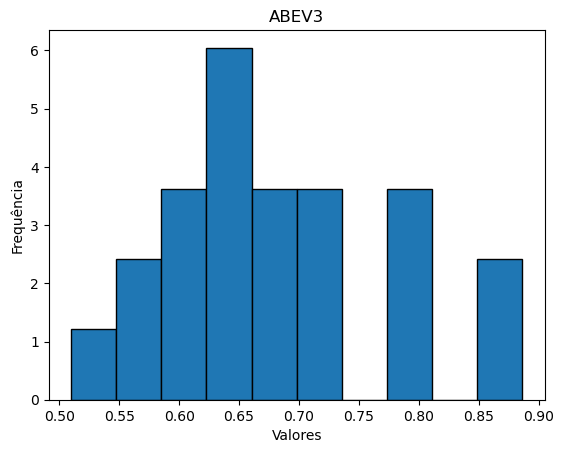

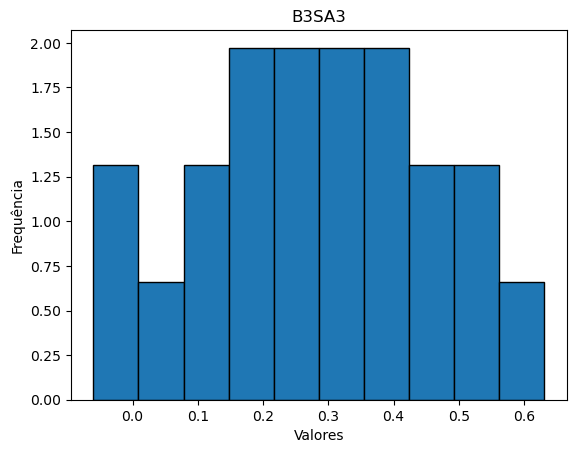

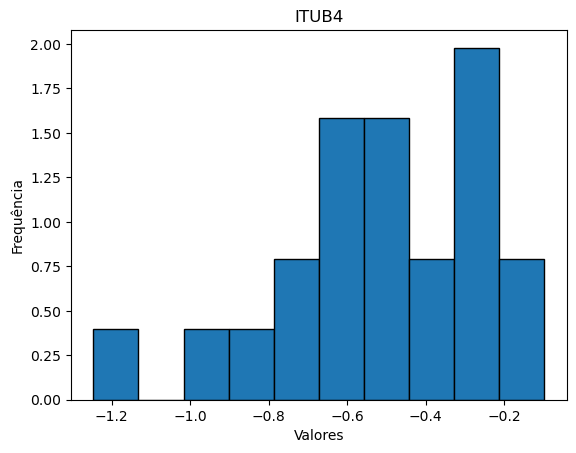

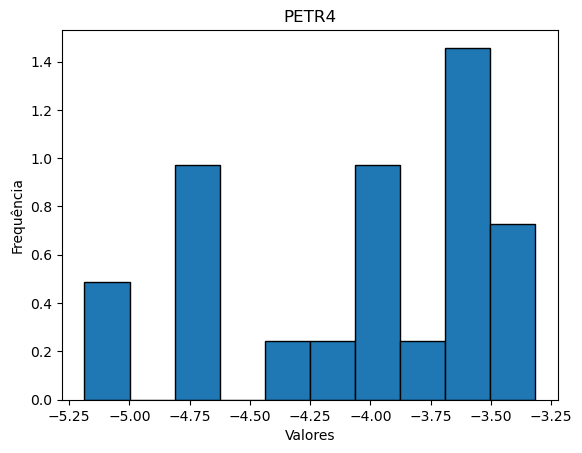

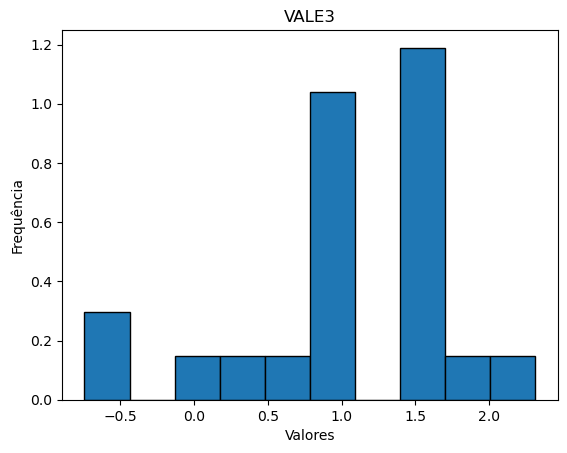

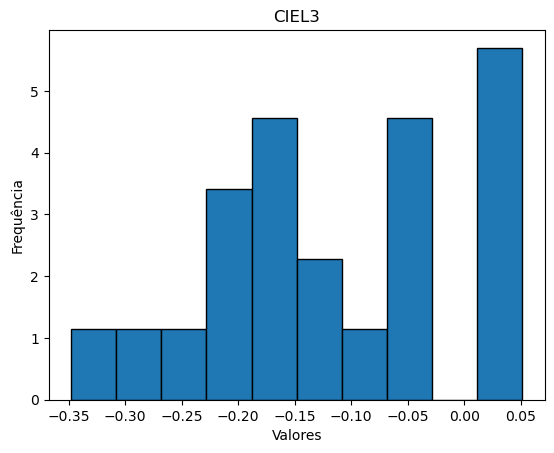

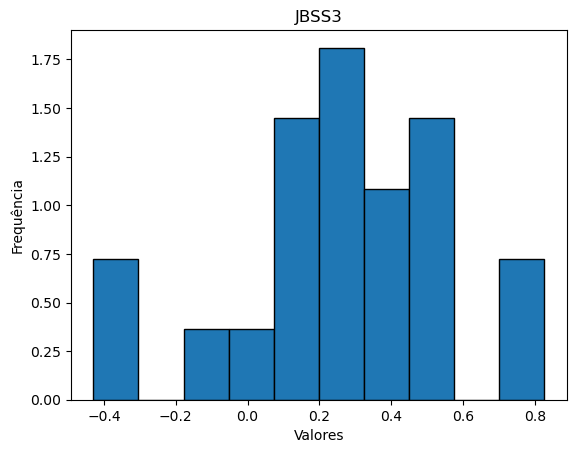

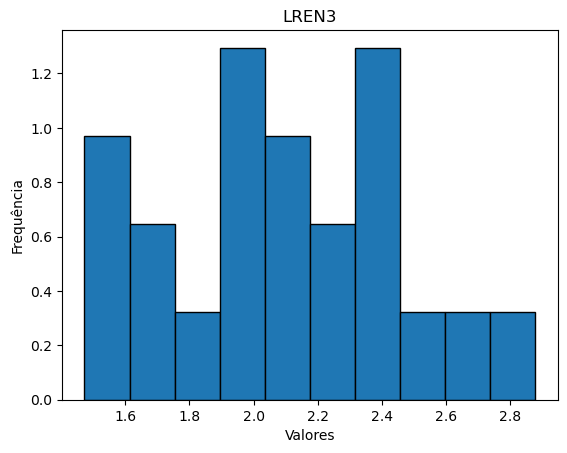

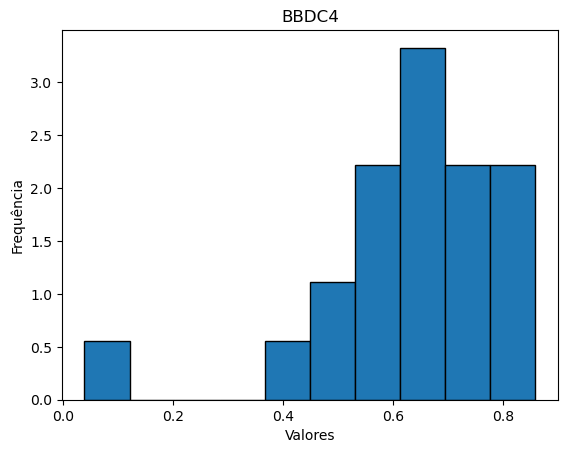

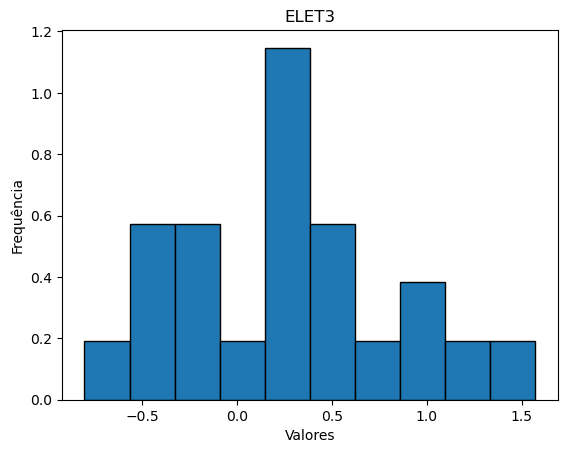

In [57]:
for i in features: 
    df[i].plot(kind='hist', density=True, bins=10, edgecolor='black')

    # Adiciona rótulos e título
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title(i)
    plt.savefig( r"C:\Users\usuario\OneDrive\Área de Trabalho\stonks\Hist_"+i+ '.jpg', format='jpg')
    # Exibe o gráfico
    plt.show()

In [63]:
alfa = df.describe().transpose()[['mean', 'std']]
alfa['conf'] = df.describe().transpose()[[ 'std']]*3


,mean,std,conf
ABEV3,0.679415,0.096579,0.289738
B3SA3,0.283840,0.188486,0.565459
ITUB4,-0.503110,0.281796,0.845387
PETR4,-4.037939,0.600557,1.801670
VALE3,1.031998,0.766321,2.298962
CIEL3,-0.115718,0.112171,0.336513
JBSS3,0.261547,0.309569,0.928707
LREN3,2.085798,0.376331,1.128994
BBDC4,0.627320,0.173480,0.520439
ELET3,0.250041,0.603210,1.809631


In [31]:
df

,ABEV3,B3SA3,ITUB4,PETR4,VALE3,CIEL3,JBSS3,LREN3,BBDC4,ELET3
2024-01-03,0.774340,0.248672,-0.222514,-4.771331,0.793249,-0.170803,0.825688,2.373341,0.405432,0.364734
2024-01-04,0.654359,0.630967,-0.223155,-3.504669,1.458264,0.018931,0.546583,2.736577,0.616391,0.685293
2024-01-05,0.679595,0.012578,-1.246384,-3.913379,1.398486,-0.289722,0.251652,1.698837,0.039229,0.379921
2024-01-08,0.625710,-0.060277,-0.222810,-3.531949,0.872802,-0.229114,0.353100,1.473172,0.491760,0.567209
2024-01-09,0.782669,0.414914,-0.475653,-3.437854,1.444818,0.026630,0.170486,2.494676,0.859037,-0.240337
2024-01-10,0.510047,0.348903,-0.546781,-3.377300,1.620925,-0.124865,-0.075262,2.369521,0.780384,-0.805984
2024-01-11,0.786430,0.206047,-0.659704,-3.985632,0.187275,-0.112523,0.297699,2.116828,0.660982,-0.297510
2024-01-12,0.614934,0.084202,-0.643617,-3.814609,1.484115,-0.055974,-0.355319,1.577269,0.724933,0.393882
2024-01-15,0.634624,0.181222,-0.661651,-4.140071,0.750757,-0.056763,0.119624,1.982044,0.595487,-0.415219
2024-01-16,0.885851,0.369110,-0.105290,-3.315195,1.569012,0.024189,0.538119,2.321198,0.790952,1.571590


In [38]:
vetorzao = []
for i, f in df.iterrows():
    for j in f:
        vetorzao.append(j)


array([[<Axes: title={'center': '0'}>]], dtype=object)

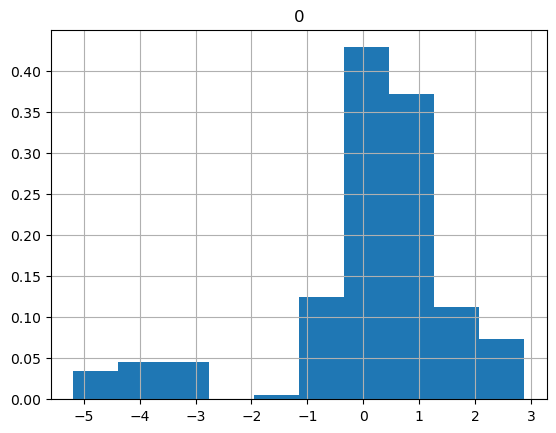

In [43]:
pd.DataFrame(vetorzao).hist(density=True)

In [44]:
pd.DataFrame(vetorzao).describe()

,0
count,220.000000
mean,0.056319
std,1.573935
min,-5.186796
25%,-0.222588
50%,0.345955
75%,0.749661
max,2.877551


In [58]:
dados.shape

(23, 10)